In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.3.1
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.2
numpy 1.18.4
pandas 1.1.4
sklearn 0.23.2
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

xtrain_all, xtest, ytrain_all, ytest = train_test_split(
    housing.data, housing.target, random_state=7)
xtrain, xvalid, ytrain, yvalid = train_test_split(
    xtrain_all ,ytrain_all, random_state=11)
print(xtrain.shape, ytrain.shape)
print(xvalid.shape, yvalid.shape)
print(xtest.shape, ytest.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xvalid_scaled= scaler.transform(xvalid)
xtest_scaled = scaler.transform(xtest)

In [5]:
# 多输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)  # 需要调用
output2 = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_wide, input_deep], 
                           outputs=[output, output2])

model.summary()
model.compile(loss="mean_squared_error", 
              optimizer = keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-5)]

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           210         input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
_______________________________________________________________________________________

In [7]:
# 训练时需要拆分
xtrain_scaled_wide = xtrain_scaled[:, :5]
xtrain_scaled_deep = xtrain_scaled[:, 2:]
xvalid_scaled_wide = xvalid_scaled[:, :5]
xvalid_scaled_deep = xvalid_scaled[:, 2:]
xtest_scaled_wide = xtest_scaled[:, :5]
xtest_scaled_deep = xtest_scaled[:, 2:]

history = model.fit([xtrain_scaled_wide, xtrain_scaled_deep], 
                     [ytrain, ytrain],
                    validation_data=([xvalid_scaled_wide, xvalid_scaled_deep], 
                                      [yvalid, yvalid]),
                    epochs=100, callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 1ms/step - loss: 4.0472 - dense_2_loss: 1.9377 - dense_3_loss: 2.1095 - val_loss: 2.3443 - val_dense_2_loss: 0.9655 - val_dense_3_loss: 1.3788
Epoch 2/100
363/363 [==============================] - 0s 851us/step - loss: 1.9294 - dense_2_loss: 0.7717 - dense_3_loss: 1.1577 - val_loss: 1.8893 - val_dense_2_loss: 0.7417 - val_dense_3_loss: 1.1477
Epoch 3/100
363/363 [==============================] - 0s 858us/step - loss: 1.6414 - dense_2_loss: 0.6447 - dense_3_loss: 0.9967 - val_loss: 1.6464 - val_dense_2_loss: 0.6503 - val_dense_3_loss: 0.9962
Epoch 4/100
363/363 [==============================] - 0s 879us/step - loss: 1.4696 - dense_2_loss: 0.5890 - dense_3_loss: 0.8806 - val_loss: 1.5054 - val_dense_2_loss: 0.6111 - val_dense_3_loss: 0.8943
Epoch 5/100
363/363 [==============================] - 0s 854us/step - loss: 1.3540 - dense_2_loss: 0.5540 - dense_3_loss: 0.8000 - val_loss: 1.4011 - val_dense_2_loss: 0.5792 - val_dense_3_

363/363 [==============================] - 0s 992us/step - loss: 0.8212 - dense_2_loss: 0.3657 - dense_3_loss: 0.4555 - val_loss: 0.8594 - val_dense_2_loss: 0.3842 - val_dense_3_loss: 0.4752
Epoch 42/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8184 - dense_2_loss: 0.3646 - dense_3_loss: 0.4538 - val_loss: 0.8560 - val_dense_2_loss: 0.3839 - val_dense_3_loss: 0.4721
Epoch 43/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8110 - dense_2_loss: 0.3610 - dense_3_loss: 0.4500 - val_loss: 0.8491 - val_dense_2_loss: 0.3794 - val_dense_3_loss: 0.4698
Epoch 44/100
363/363 [==============================] - 0s 970us/step - loss: 0.8079 - dense_2_loss: 0.3604 - dense_3_loss: 0.4475 - val_loss: 0.8452 - val_dense_2_loss: 0.3805 - val_dense_3_loss: 0.4647
Epoch 45/100
363/363 [==============================] - 0s 1ms/step - loss: 0.8051 - dense_2_loss: 0.3588 - dense_3_loss: 0.4463 - val_loss: 0.8381 - val_dense_2_loss: 0.3732 - val_dense_3_loss: 0.4649

363/363 [==============================] - 0s 939us/step - loss: 0.7265 - dense_2_loss: 0.3306 - dense_3_loss: 0.3958 - val_loss: 0.7570 - val_dense_2_loss: 0.3440 - val_dense_3_loss: 0.4130
Epoch 82/100
363/363 [==============================] - 0s 937us/step - loss: 0.7271 - dense_2_loss: 0.3313 - dense_3_loss: 0.3958 - val_loss: 0.7614 - val_dense_2_loss: 0.3469 - val_dense_3_loss: 0.4146
Epoch 83/100
363/363 [==============================] - 0s 967us/step - loss: 0.7251 - dense_2_loss: 0.3303 - dense_3_loss: 0.3949 - val_loss: 0.7595 - val_dense_2_loss: 0.3471 - val_dense_3_loss: 0.4123
Epoch 84/100
363/363 [==============================] - 0s 933us/step - loss: 0.7249 - dense_2_loss: 0.3302 - dense_3_loss: 0.3947 - val_loss: 0.7595 - val_dense_2_loss: 0.3441 - val_dense_3_loss: 0.4154
Epoch 85/100
363/363 [==============================] - 0s 935us/step - loss: 0.7215 - dense_2_loss: 0.3285 - dense_3_loss: 0.3930 - val_loss: 0.7567 - val_dense_2_loss: 0.3431 - val_dense_3_loss: 

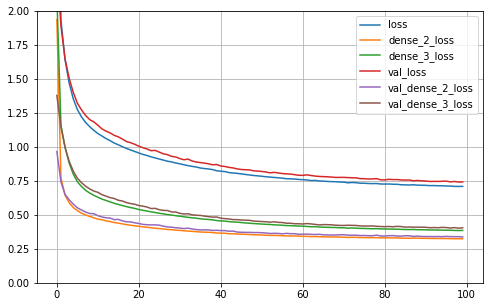

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
    
plot_learning_curves(history)

In [9]:
# 第一个值为第二和第三个的和
model.evaluate([xtest_scaled_wide, xtest_scaled_deep], [ytest, ytest], verbose=0)

[0.7114938497543335, 0.3302454352378845, 0.381248414516449]